# Exercises for Session 7: Web Scraping 2

In session 6 you learned how to download the HTML of a webpage. In this session you will learn how to locate the information you want in the HTML. It requires an understanding of how HTML is structured and methods to navigate the structure. In the exercises below you will mainly use the package `BeautifulSoup` to navigate the HTML (read more about BeautifulSoup in the [documentation](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)).

# Part 1: Parsing a table from HTML using BeautifulSoup.

In this exercise you will learn how to extract the information you want from a webpage's HTML. `BeautifulSoup` is a useful package in Python that makes it easy to navigate the HTML and find the information you are looking for. 

The purpose of the exercise is to extract the data that are available on this webpage: https://www.basketball-reference.com/leagues/NBA_2018.html

Before working with the exercise, you should watch the 2 videos (7.1 and 7.2) below. The type of data you shall scrape in the exercise is quite different from what you see in the video: In the video we scrape text from articles; in the exercise you will scrape tables and make them into pandas DataFrames. 
Keep in mind that the principles are completely identical: You need to locate the information in the HTML and then convert it to some meaningful data (it could be a text file or a dataframe)

(I might talk a bit slow in some of the videos. Remember that you can turn up the speed on Youtube)

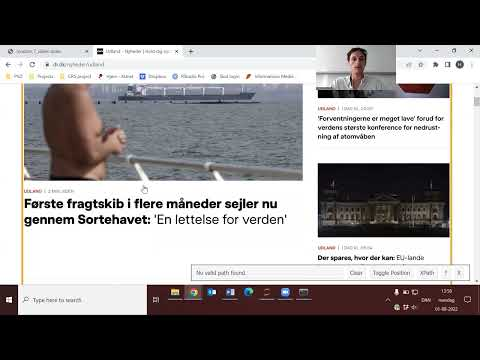

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('gs0xktunF-g', width=640, height=360)

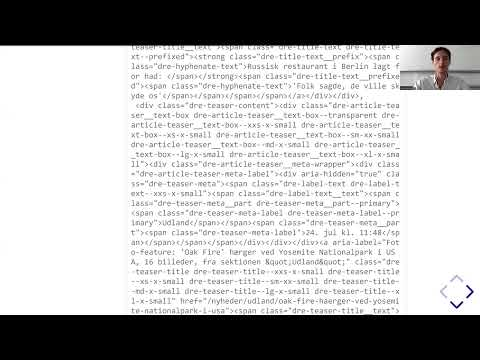

In [2]:
YouTubeVideo('GSUw069jOo8', width=640, height=360)

> **Ex. 7.1.1:** Open https://www.basketball-reference.com/leagues/NBA_2018.html. Download the webpage's HTML as you have done before with `Requests`. We want to locate the conference standings of the Eastern Conference in the HTML. 

> Go to "Elements" in the Chrome Developer Tools and find the Eastern Conference table in the HTML. Use `BeautifulSoup` to parse the HTML, so you only have the HTML of the Eastern Conference table.

> *Hint:* What [tag name](https://www.w3schools.com/TAgs/default.asp) is used for tables? And what [attribute](https://www.w3schools.com/html/html_attributes.asp) identifies the table? Use it to select the table.

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
url = 'https://www.basketball-reference.com/leagues/NBA_2018.html'
response = requests.get(url, headers={'name':'Marius Heltberg Lassen','email':'pgb206@alumni.ku.dk'})
soup = BeautifulSoup(response.content, 'lxml')

In [214]:
east_conf = soup.find('table', id='confs_standings_E')

Now you have located the table. Inspect the table in "Elements" in Chrome Developer Tools and notice how a table is written in HTML. Ask yourself: Which tag names can be used to locate rows? And columns/headers? In the following exercises we use these tag names to download the data in the table.

> **Ex. 7.1.2:** Use `find_all` to search for the columns/headers of the table. Loop through all the columns to extract the text of each column. Store the columns in a list.

> *Hint:* Notice that the table consists of a thead and tbody. The columns are located in the thead.

In [38]:
cols = east_conf.select('thead')[0].find_all('th')

cols_list = []
for col in range(len(cols)):
    cols_list.append(cols[col]['aria-label'])

> **Ex. 7.1.3:** Now locate the rows (the rows are in tbody). Use `find_all` to locate all rows in the table and store in a list called *rows_list*.

In [61]:
rows = east_conf.select('tbody')[0].find_all('th', class_ = 'left')

rows_list = []
for row in range(len(rows)):
    rows_list.append(rows[row].select('a')[0].text)

> **Ex. 7.1.4:** Loop through all rows in *rows_list* and extract the values. 

> *Hint:* Since the values in a row have different tags ("th" or "tr") we cannot use `find_all` to go through all values (`find_all` is used when the tag is the same). Instead we can use `.children` to get all values (/children) in each row. 
> 
> 1. Loop through the values in each row with a `for loop` to get all the values of the row and store in a list (use `append` to append to list).
>
> 2. Once you have constructed such a loop, you can construct another for loop around it that loops through all the rows in *rows_list*. Your outcome should be a list of the lists of all the row values (again use `append` to do this).
> - Your outcome should look like this: 
> 
> ```[['Toronto Raptors*', '59', '23', '.720', '—', '111.7', '103.9', '7.29'],
 ['Boston Celtics*', '55', '27', '.671', '4.0', '104.0', '100.4', '3.23'],
 ...]```

In [124]:
row_data = [] 
for row in range(len(east_conf.select('tbody')[0].find_all('tr'))):
    row_i = []
    for x in east_conf.select('tbody')[0].find_all('tr')[row].children:
        row_i.append(x.text)
    row_data.append(row_i)

> **Ex. 7.1.5:** Combine your answers to **Ex. 7.1.2-4** to make a function called *parse_html_table* that creates a DataFrame from the HTML.

> *Hint:* The only new thing you need to do is to create a DataFrame out of the list of lists you made in ex. 7.1.4.
>
> Try to search on google to figure out how to make a dataframe out of a list of lists.

In [222]:
def parse_html_table(table_name):
    table = soup.find('table', id=table_name)
    cols = table.select('thead')[0].find_all('th')

    cols_list = []
    for col in range(len(cols)):
        try:
            column_name = cols[col]['aria-label']
        except:
            continue
        if column_name != "":
            cols_list.append(column_name)

    row_data = [] 
    for row in range(len(table.select('tbody')[0].find_all('tr'))):
        row_i = []
        for x in table.select('tbody')[0].find_all('tr')[row].children:
            row_i.append(x.text)
        row_data.append(row_i)

    return pd.DataFrame(row_data, columns=cols_list)

> **Ex. 7.1.6:** Now instead of only looking at the Eastern Conference standings table we want to get the data of all tables on the webpage. 

> 1. Locate all tables on the page by using `find_all` to search for the table tag name (```<table>```). Name the list of tables as "tables".

> 2. Use your function *parse_html_table* to loop through all tables in "tables" and parse their data. Store all the dataframes in a list.
>
> *Hint:* You need to make a for loop with two lines of code in it: 
>- in the first line you use your function *parse_html_table* to make a dataframe, 
>- and in the second line you append the dataframe to an empty list of dataframes that you have made before the loop.

In [223]:
# 1.
tables = []
for table in soup.find_all('table'):
    tables.append(table['id'])

# 2. 
df_list = [parse_html_table(x) for x in tables]

> **Ex. 7.1.7 (extra) :** `Pandas` has a built-in function called `read_html` that does the exact same thing as you have just learned. Compare your results to this Pandas implementation ([pd.read_html](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_html.html)). 

> *Note:* It may seem like a lot of work to go through all the steps when there is a function that does it already. However, the purpose of the exercises above is to prepare you for your own scraping challenges, and that is best done by hard coding everything. It is also important to note that scraping is no exact science, so there may be websites where the general function `read_html` does not work. In those cases, you should be able to build your own scraper.

In [229]:
pd.read_html(url)

[      Eastern Conference   W   L   W/L%    GB   PS/G   PA/G   SRS
 0       Toronto Raptors*  59  23  0.720     —  111.7  103.9  7.29
 1        Boston Celtics*  55  27  0.671   4.0  104.0  100.4  3.23
 2    Philadelphia 76ers*  52  30  0.634   7.0  109.8  105.3  4.30
 3   Cleveland Cavaliers*  50  32  0.610   9.0  110.9  109.9  0.59
 4        Indiana Pacers*  48  34  0.585  11.0  105.6  104.2  1.18
 5            Miami Heat*  44  38  0.537  15.0  103.4  102.9  0.15
 6       Milwaukee Bucks*  44  38  0.537  15.0  106.5  106.8 -0.45
 7    Washington Wizards*  43  39  0.524  16.0  106.6  106.0  0.53
 8        Detroit Pistons  39  43  0.476  20.0  103.8  103.9 -0.26
 9      Charlotte Hornets  36  46  0.439  23.0  108.2  108.0  0.07
 10       New York Knicks  29  53  0.354  30.0  104.5  108.0 -3.53
 11         Brooklyn Nets  28  54  0.341  31.0  106.6  110.3 -3.67
 12         Chicago Bulls  27  55  0.329  32.0  102.9  110.0 -6.84
 13         Orlando Magic  25  57  0.305  34.0  103.4  108.2 -